## Empezar con nuevos datasets

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.io  

In [8]:
# definir la ruta del archivo .mat
file_path = r"/Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Modelos computacionales I/Neurociencias-2026-1/S03_datasets/BCT/macaque47.mat"

# leer el contenido del archivo.mat
file_dict = scipy.io.loadmat(file_path)

In [9]:
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [10]:
# arreglo que contenga la variable CIJ
matriz = file_dict["CIJ"]

# otra con los nombres
columnas = file_dict["Names"]

In [12]:
matriz.shape, len(columnas)

((47, 47), 47)

In [16]:
# creamos un data frame que incluya la matriz y los nombres
macaco_df = pd.DataFrame(data = matriz, columns = columnas, index = columnas)

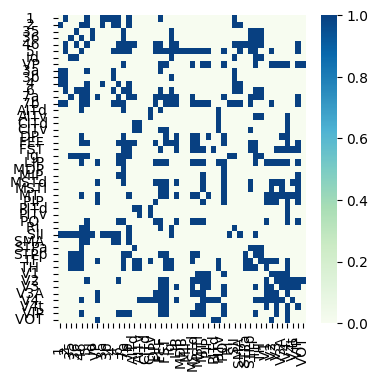

In [31]:
# generar el mapa de color del dataframe
plt.figure(figsize = (4,4))
ax = sns.heatmap(macaco_df.values, 
                 annot = False, cmap = "GnBu", fmt = ".2f",
                 xticklabels = macaco_df.columns, yticklabels = macaco_df.columns)
plt.show()

# Actividad: 
1. filtrar el dataframe para quedarse con las columnas 15 a 35, y las filas 15 a 35
2. Mostrar el mapa de calor
3. Crear el grafo dirigido 
4. calcular el grado del grafo

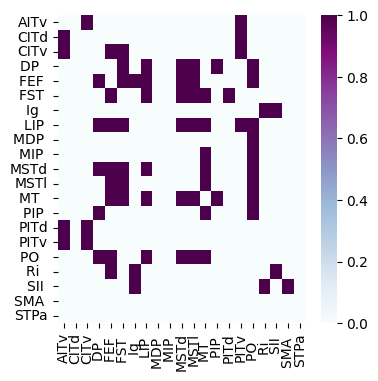

In [50]:
#1.
act = macaco_df.iloc[15:36, 15:36]

#2.
plt.figure(figsize = (4,4))
mapa = sns.heatmap(act.values, 
                 annot = False, cmap = "BuPu", fmt = ".2f",
                 xticklabels = act.columns, yticklabels = act.columns)
plt.show()

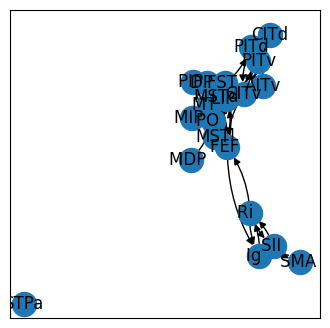

In [62]:
# 3.
plt.figure(figsize = (4,4))
G = nx.from_pandas_adjacency(act, create_using=nx.DiGraph)

pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, with_labels = True, arrows = True, arrowstyle = "-|>", connectionstyle = "arc3, rad=0.15")